In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

### Monte Carlo Integration

#### 1) Let integrate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a cube $x \in [-1,1], y\in [-1,1], z\in [-1,1]$

#### 2) Evaluate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a sphere of radius 1 centered at the origin.

3) Do we guarantee to get the same answer when we repeat the experiment?

4) What do we need to do to guarantee the same answer?

5) How do we defind the convergence and how fast is the convergence for monte carlo integration?

## Hill Climbing/Random Search/Simulated Annealing/ .....

In [ ]:
# Gradient Descent. --> Gradient

# menu --> Discrete (McDonald, Noodle, Subway, KMK )
# cost(menu)

# d/d menu cost --> Doesn't exist


# 500^3 --> Absolute best.

# Loop

# Hill Climbing/Random Search

# Drunk & Greedy Algorithm
# cost(point1, point2, point3)
# try change point2 -> point2_1 (randomly)
# if area decrese --> that means point2_1 is a bad idea
# if area increase --> Good choice. Keep it.

# Puturb it a little bit -- > Dont' reset your answer


### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

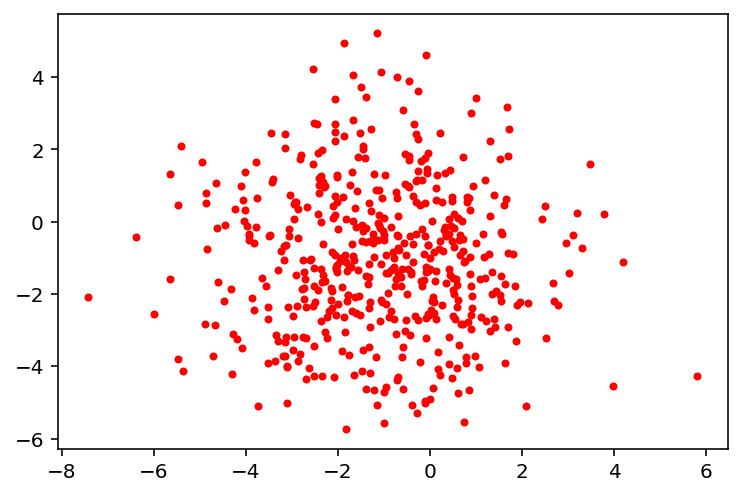

In [5]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

In [6]:
def triarea(x1,y1, x2,y2, x3,y3):
    #shoelace formula
    return 0.5*abs(x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1)

def triarea2(r):
    x1,y1 = r[0]
    x2,y2 = r[1]
    x3,y3 = r[2]
    return triarea(x1,y1, x2,y2, x3,y3)


0 [[-3.5537556933192986, -1.7908547787871583], [-0.3024988122619554, 1.1364018180978834], [2.1332804547489572, -2.236564767409557]]
12 [[-3.5537556933192986, -1.7908547787871583], [-0.9907721976491266, -5.560919652318169], [2.1332804547489572, -2.236564767409557]]
29 [[-3.5537556933192986, -1.7908547787871583], [-0.9907721976491266, -5.560919652318169], [-0.26280983544577496, 2.2842672517705815]]
37 [[-3.5537556933192986, -1.7908547787871583], [-0.9907721976491266, -5.560919652318169], [1.294618004023806, 0.15201499345396807]]
49 [[-2.3507501152376107, 1.9833749248529036], [-0.9907721976491266, -5.560919652318169], [1.294618004023806, 0.15201499345396807]]
51 [[-3.7650949692731848, 0.6447312804534537], [-0.9907721976491266, -5.560919652318169], [1.294618004023806, 0.15201499345396807]]
53 [[-3.7650949692731848, 0.6447312804534537], [-0.9907721976491266, -5.560919652318169], [1.5134861366727788, 1.736309750313756]]
60 [[-5.466105696876234, -3.7858703605927326], [-0.9907721976491266, -5.

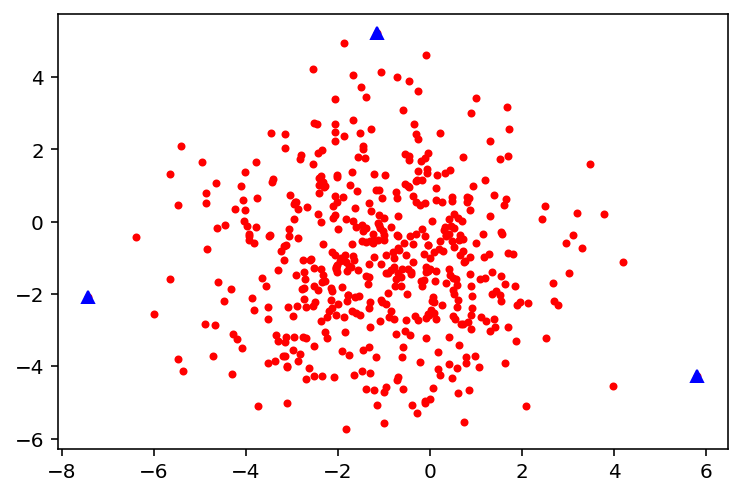

In [11]:
# Hill Climbing/Random Search

# Drunk & Greedy Algorithm
# cost(point1, point2, point3)
# try change point2 -> point2_1 (randomly)
# if area decrese --> that means point2_1 is a bad idea
# if area increase --> Good choice. Keep it.

# Puturb it a little bit -- > Dont' reset your answer

# state = [[x1, y1,], [x2, y2], [x3, y3]]

def cost(state):
    return triarea2(state)
    
def random_state(): # get initial random state
    n_points = len(x)
    return [[x[i], y[i]]for i in np.random.randint(n_points, size=3)]
    
def purturb(old_state):
    n_points = len(x)
    
    ret = [s for s in old_state] # shallow copy
    point_to_change = np.random.randint(3)
    
    change_to_index = np.random.randint(n_points)
    ret[point_to_change] = [x[change_to_index], y[change_to_index]]
    return ret
    
    
def hill_climbing(initial_state, n):
    current_best = initial_state
    current_score = cost(initial_state)
    
    for i in range(n):
        to_try = purturb(current_best)
        to_try_score = cost(to_try)
        if to_try_score > current_score:
            current_best = to_try
            current_score = to_try_score
            print(i, current_best)
    return current_best

guess = hill_climbing(random_state(), 10000)
plt.plot(x,y,'.r')
for i in range(3):
    plt.plot(guess[i][0], guess[i][1], '^b')
    
# make sure you didn't just change every point
# make a copy of old state

In [12]:
500**3

125000000

### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

[[ 0 68 59 ... 65 53  0]
 [68  0  0 ...  4 55  0]
 [59  0  0 ... 28  4 59]
 ...
 [65  4 28 ...  0  3  7]
 [53 55  4 ...  3  0  0]
 [ 0  0 59 ...  7  0  0]]


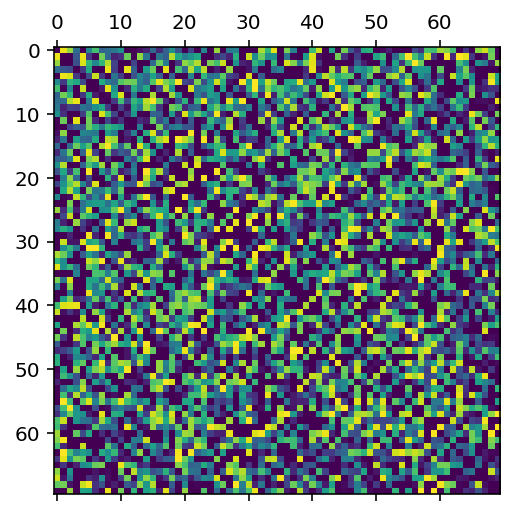

In [14]:
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))

np.random.seed(222)
for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0
    
print(student)

plt.matshow(student)

In [15]:
student[1, 10] # of complaints if class 1 and class 10 are in the same time slot

10

In [26]:
n_class = 70
n_timeslot = 15

def cost(state):
    s = 0
    for c1 in range(n_class):
        for c2 in range(c1, n_class):
            if state[c1] == state[c2]:
                s+=student[c1, c2]
    return s
    
def purturb(state):
    class_to_change = np.random.randint(n_class)
    change_to = np.random.randint(n_timeslot)
    new_state = [x  for x in state]
    new_state[class_to_change] = change_to
    return new_state

def random_state():
    return np.random.randint(n_timeslot, size=n_class)
    
def better_time_slot(initial_state, n):
    current_state = initial_state
    current_complaints = cost(current_state)
    
    for i in range(n):
        to_try = purturb(current_state)
        try_score = cost(to_try)
        #print(to_try, try_score)
        if try_score < current_complaints:
            current_state = to_try
            current_complaints = try_score
            print(i, current_complaints)
    return current_state
        
    # profit!!!
    
better_time_slot(random_state(), 20000)

3 4211
5 3995
6 3972
7 3886
9 3880
13 3837
14 3831
15 3817
16 3775
17 3733
20 3622
21 3619
22 3542
23 3541
25 3531
27 3405
28 3385
33 3383
35 3353
43 3296
44 3186
45 3037
50 3036
52 2945
54 2844
56 2728
57 2704
63 2689
67 2641
76 2585
77 2550
81 2524
85 2500
90 2466
95 2453
96 2405
101 2400
105 2398
113 2381
115 2380
116 2351
117 2283
118 2273
122 2254
143 2201
155 2138
173 2081
181 2056
184 2047
189 2031
193 2030
197 1982
202 1939
211 1862
215 1843
217 1818
223 1747
235 1741
237 1699
238 1696
248 1653
250 1641
271 1603
279 1583
280 1509
287 1477
293 1464
311 1396
329 1390
332 1368
355 1297
358 1224
399 1222
414 1219
429 1187
470 1181
472 1101
503 1078
512 1064
525 1029
602 1000
688 978
696 949
764 930
788 925
847 921
916 920
956 915
961 894
984 850
987 838
1029 827
1055 822
1068 808
1080 801
1100 795
1140 767
1183 730
1191 694
1222 672
1243 659
1296 656
1300 654
1389 615
1546 595
1587 594
1679 581
1732 573
1769 556
1784 546
1925 545
2066 528
2094 517
2183 511
2207 489
2362 482
2456 45

[1,
 7,
 5,
 8,
 9,
 3,
 3,
 9,
 0,
 4,
 10,
 11,
 13,
 14,
 11,
 13,
 4,
 9,
 2,
 12,
 14,
 13,
 13,
 7,
 14,
 7,
 1,
 2,
 8,
 12,
 12,
 2,
 13,
 5,
 0,
 12,
 6,
 8,
 4,
 11,
 6,
 0,
 5,
 7,
 8,
 5,
 5,
 9,
 0,
 6,
 13,
 2,
 1,
 11,
 0,
 1,
 0,
 11,
 10,
 8,
 4,
 3,
 14,
 2,
 10,
 1,
 7,
 4,
 10,
 6]

## Substitution Cipher is a bad idea

### Substitution Encryption

One of the weakest encryption is called substibution encryption. Here is how it works let's supposed that my message that I want to send to you is
```
this problem is easy
```

The substition encryption works by replacing each letter using a fixed dictionary. For example, suppose my encryption key dictionary is
```python
{'a':'b', 'b':'c', 'c':'d', ...}
```
This tells that every character `a` in the message should be replaced by letter `b` in the encrypted messsage and so on.

Using the dictionary above, then the encrypted message would be
```
uijt qspcmfn jt fbtz 
```

If we know the dictionary key(which is typically agreed before sending the message), it's very easy to invert. Since `a` maps to `b` in encryption that means to decrypt it we just need to replace every `b` to `a`.

ROT13 you did in programming I is an example of substitution encryption.

In this problem we will use hill climbing to crack this encryption. That is we want to decrypt the message **without** knowing what the encryption key is. We are going to use math and some probabilities. For simplicity of this problem we will only deal with lower case letters and no punctuation except for space.

### Problem

In this problem your job is to **decrypt the msssage**.
 - The encrypted message is
```
 vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum
```

Of course you are not given the encryption key. The goal is to find the best encryption key and decrypt the message.

### What is the best key?

Since you are not given the encryption key, it seems like it is impossible to decrypt the message. However, due to probabilistic nature of natural language, it is quite easy to figure out whether a random sequence of letters the real english message or not. A good key would give a decrypt message that looks like a real english message.

For example, given the same encrypted message and you guess for two keys. The first key gives you the decrypted message of
```
i am the best
```
while the second key give you the decrypted message of
```
j bn uif cftu
```
It is quite clear the that top one is more like an English language therefore the first key is probably a better key.

To tell a computer what sequence of letter looks more like English. We can take a look at thick book and look for how frequent 2 consecutive letters(bigram) appear in the book.

For example, let's take the probability of 2 consecutive letters(bigram) to appear in an english message. The bigram `th` appears way more than `di`. So, if the encryption key that gives a lot of `th` bigram is more likely to be correct than the one that gives a lot of `di`.

Plus the fact that one character word is most likely going to be either `a` or `i`. If the key we guess put `a` or `i` in there, we are probably getting the right key.

Our method relies on the fact that some n consecutive letters(n-gram) appear more than other. Fortunately, someone wrote a program to read a huge amount of English books and count how many times n-gram appear. The file for 2-gram frequency is given in `count_2l.txt` and the file for 3-gram frequency is given in `count_3l.txt`. Source: http://norvig.com/ngrams/

To help you, I already give you a function for reading those files and convert the frequencies to score(which is a log probability). (If you want to know why, take pattern recognition.). The result is kept in dictionaries(more on next section).

### How the score works

As described in the previous section, the score should be a measure of how likely a sequence of decrpyted message to be an english message. To give an accurate score, we want to split the score in to three cases depending on the length of the word.

To give a score on a decrypted message. The score will be the sum of the score on each decrypted word.
- For word with 1 letter the score is given by looking up the dictionary `unigram_score`
- For word with 2 letters the score is given by looking up the dictionary `bigram_score`
- For word with 3 or more letters the score is given by computing the score of **every trigram**. The score of each trigram is given by the dictionary `trigram_score`. For example, the decrypted word `defts` will score
```python
trigram_score['def'] + trigram_score['eft'] + trigram_score['fts']
```
- The total score is given by the sum of score for each word in the decrypted message.

#### Note:
For dictionary lookup fail just give it score of -100). `dict.get` is your friend.

### Hint

 - Do not write this whole thing in one big function. You will just confuse yourself.
 - It should converge within a couple thousand iterations. If it doesn't, try agian, it might get stuck at local minima.

In [1]:
cipher_text = 'vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum'

In [2]:
print(cipher_text)

vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum


In [9]:
import string
import math

def load_l2score_dict():
    with open('count_2l.txt') as f:
        total = 0
        d = {}
        for l in f:
            t, n = l.split()
            d[t] = int(n)
            total += int(n)
        for k,v in d.iteritems():
            d[k] = math.log(d[k]/float(total))
        return d
    
def load_l3score_dict():
    with open('count_3l.txt') as f:
        total = 0
        d = {}
        for l in f:
            t, n = l.split()
            d[t] = int(n)
            total += int(n)
        for k,v in d.iteritems():
            d[k] = math.log(d[k]/float(total))
    return d
unigram_score = {x: (math.log(0.5) if x=='a' or x=='i' else -100.) for x in string.lowercase }
bigram_score = load_l2score_dict()
trigram_score = load_l3score_dict()

In [10]:
print(unigram_score['a'])
print(bigram_score['th']) # more frequent word more score(less negative)
print(bigram_score['di']) # less frequent word less score(more negative)
print(trigram_score['thi'])

-0.69314718056
-3.91357006207
-5.29986826667
-6.1101524914
